# Corporate Bankruptcy Prediction

This project aims to predict corporate bankruptcy using various machine learning models. The dataset used contains financial indicators of companies, and the goal is to identify factors contributing to bankruptcy.

## Step 1: Import Libraries
We will start by importing necessary Python libraries and installing any additional packages.

In [88]:
!pip install scikit-learn xgboost

In [89]:
# Split the dataset into training and testing sets
# Split the dataset into training and testing sets
# Install necessary libraries (if not already installed)

# Import essential Python libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import requests for data fetching
import requests
from io import BytesIO

# Import machine learning models and metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [90]:
# Load the dataset and handle potential encoding issues
# Define the URL for the dataset (hosted on GitHub)
url = 'https://raw.githubusercontent.com/jtmtran/Corporate-Bankruptcy-Prediction/refs/heads/main/Company%20Bankruptcy.csv'

# Fetch the dataset from the URL
response = requests.get(url)

# Check if the request was successful before loading the dataset
if response.status_code == 200:
    # Load the dataset into a DataFrame using the correct encoding
    df = pd.read_csv(BytesIO(response.content), encoding='ISO-8859-1')
    print("Dataset successfully loaded.")
else:
    print(f"Failed to retrieve the file. Status code: {response.status_code}")

Dataset successfully loaded.


# EDA

In [91]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [93]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


1.	Feature Renaming and Cleaning:

  Some column names contain spaces or special characters (e.g., 'Net Income to Stockholder's Equity'), which can cause issues in code execution. We need to strip whitespace, remove special characters, and standardize the naming convention for consistency.
2.	Standardization and Normalization:

  The descriptive statistics show large variations in feature ranges (e.g., 'Total assets to GNP price' has a mean in the millions while other features are scaled between 0 and 1). This suggests the need for standardization or normalization to bring all features to a similar scale.

3.	Handling Skewed Features:

  Some features have a maximum value of 1.0 and a minimum of 0.0, indicating they may be binary or flag indicators. Others, such as 'Total assets to GNP price', show extreme values, suggesting potential skewness that may require log transformation or other techniques to address.

4.	Missing or Zero Variance Features:

  Features like 'Net Income Flag' have a standard deviation of 0, indicating zero variance. These features do not provide any useful information for predictive modeling and should be dropped.

5.	Outlier Detection:

  The maximum values for several features are far above the 75th percentile (e.g., 'Total assets to GNP price' has a maximum in the billions). This suggests the presence of outliers, which may need to be addressed.

6.	Feature Engineering:

  Based on the financial ratios provided, there might be opportunities for creating new features or combining existing ones (e.g., profitability ratios, liquidity ratios) to enhance the predictive power of the model.

In [94]:
# Clean column names: strip spaces, replace special characters, and remove content inside parentheses
df.columns = df.columns.str.strip()  # Remove leading and trailing spaces
#df.columns = df.columns.str.replace(' ', '_', regex=False)  # Replace spaces with underscores
df.columns = df.columns.str.replace('[\'?]', '', regex=True)  # Remove %, ', ?, and /
#df.columns = df.columns.str.replace(r'\(.*?\)', '', regex=True)  # Remove content inside parentheses

In [95]:
#Check for duplicates
df.duplicated().sum()

0

In [96]:
#Check for null values
df.isnull().sum()

,0
Bankrupt,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


In [97]:
df['Bankrupt'].value_counts()

,count
Bankrupt,
0,6599
1,220


In [98]:
'''numeric_cols = df.select_dtypes(include=np.number).columns
# Define a function to detect and treat outliers using the IQR method
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the outliers
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

# Apply the function to all numerical columns
for col in numeric_cols:
    treat_outliers(df, col)

# Plot a sample feature before and after outlier treatment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Total assets to GNP price')
plt.title('Before Outlier Treatment')

# Apply the outlier treatment
treat_outliers(df, 'Total assets to GNP price')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Total assets to GNP price')
plt.title('After Outlier Treatment')
plt.show()
'''

"numeric_cols = df.select_dtypes(include=np.number).columns\n# Define a function to detect and treat outliers using the IQR method\ndef treat_outliers(df, col):\n    Q1 = df[col].quantile(0.25)\n    Q3 = df[col].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    # Cap the outliers\n    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])\n    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])\n\n# Apply the function to all numerical columns\nfor col in numeric_cols:\n    treat_outliers(df, col)\n\n# Plot a sample feature before and after outlier treatment\nplt.figure(figsize=(12, 6))\nplt.subplot(1, 2, 1)\nsns.boxplot(data=df, x='Total assets to GNP price')\nplt.title('Before Outlier Treatment')\n\n# Apply the outlier treatment\ntreat_outliers(df, 'Total assets to GNP price')\n\nplt.subplot(1, 2, 2)\nsns.boxplot(data=df, x='Total assets to GNP price')\nplt.title('After Outlier Treatment')\nplt.show()\n"

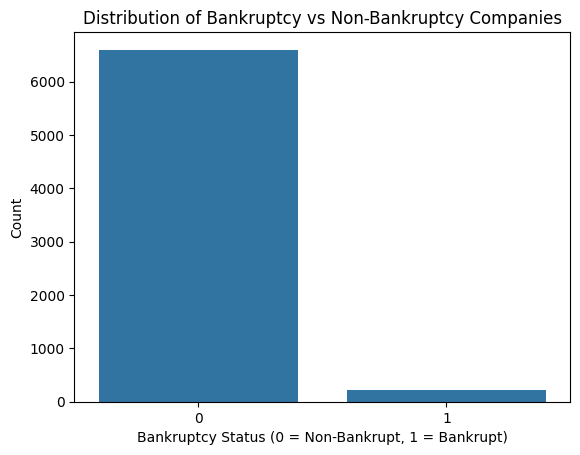

In [99]:
sns.countplot(data=df, x='Bankrupt')
plt.title('Distribution of Bankruptcy vs Non-Bankruptcy Companies')
plt.xlabel('Bankruptcy Status (0 = Non-Bankrupt, 1 = Bankrupt)')
plt.ylabel('Count')
plt.show()

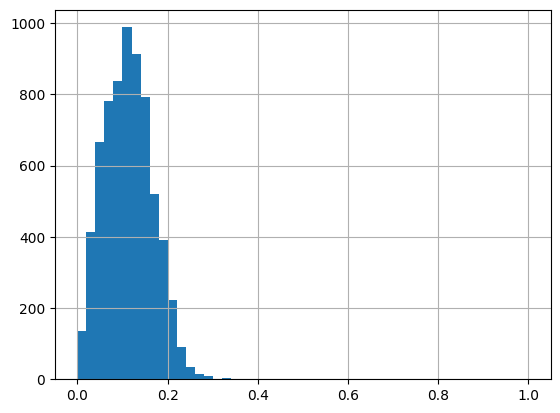

In [100]:
df['Debt ratio %'].hist(bins=50)
plt.show()

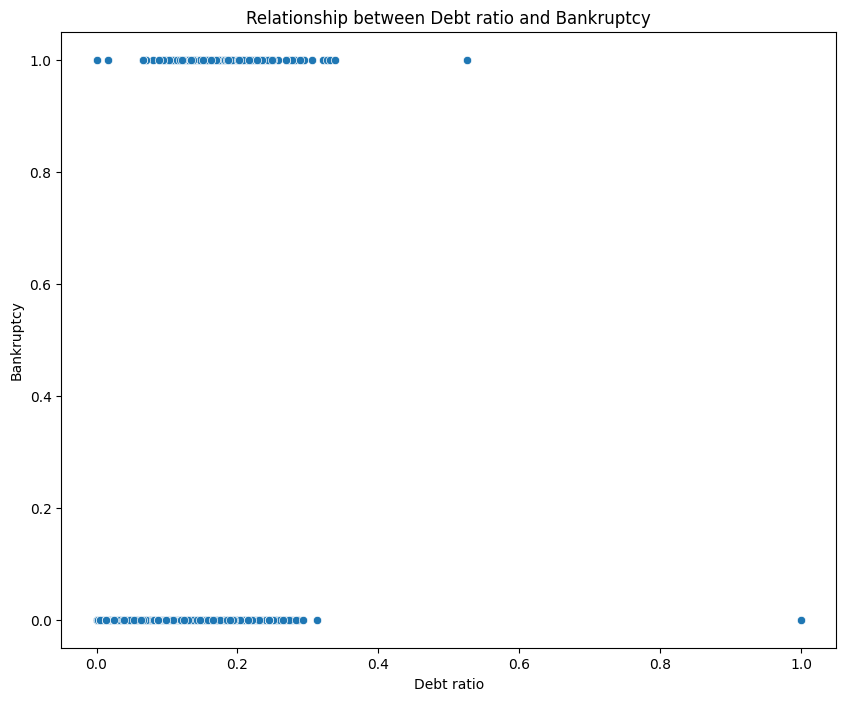

In [101]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Debt ratio %', y='Bankrupt', data=df)
plt.title('Relationship between Debt ratio and Bankruptcy')
plt.xlabel('Debt ratio')
plt.ylabel('Bankruptcy')
plt.show()

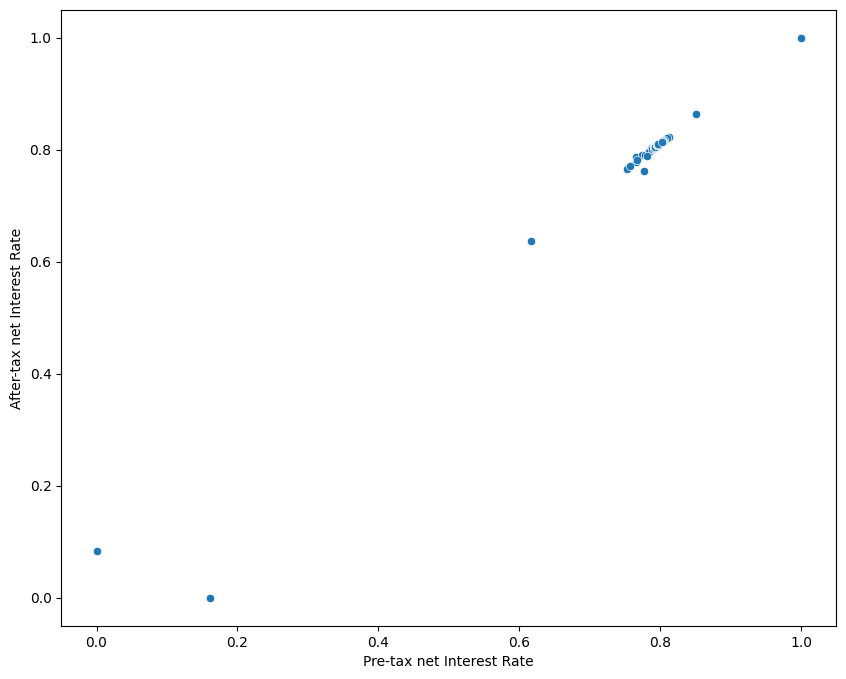

In [102]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Pre-tax net Interest Rate', y='After-tax net Interest Rate', data=df)
#plt.title('Relationship between Debt ratio and Bankruptcy')
#plt.xlabel('Debt ratio')
#plt.ylabel('Bankruptcy')
plt.show()

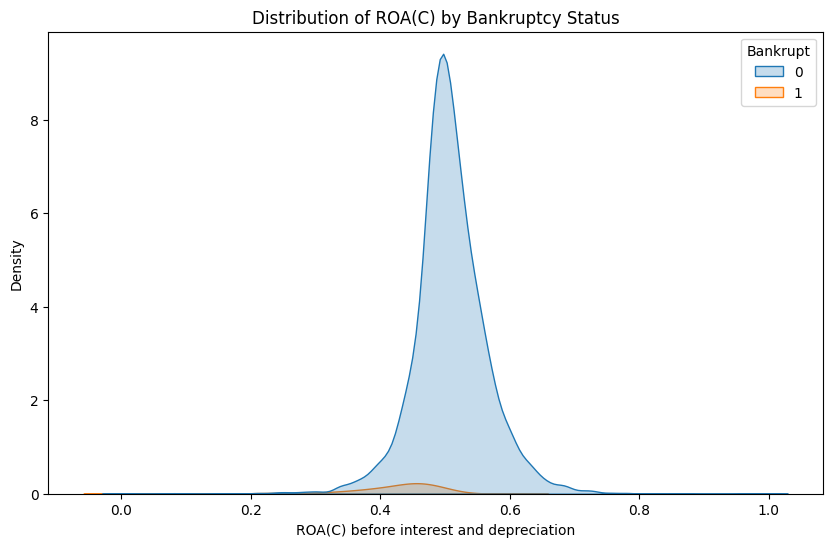

In [103]:
# KDE plot for 'ROA(C) before interest and depreciation before interest'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='ROA(C) before interest and depreciation before interest', hue='Bankrupt', fill=True)
plt.title('Distribution of ROA(C) by Bankruptcy Status')
plt.xlabel('ROA(C) before interest and depreciation')
plt.show()

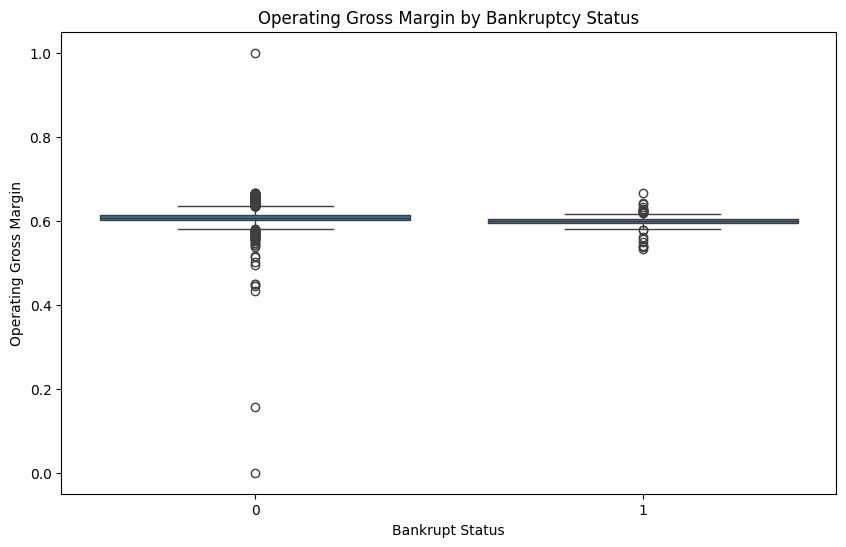

In [104]:
# Box plot for 'Operating Gross Margin' grouped by bankruptcy status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Bankrupt', y='Operating Gross Margin')
plt.title('Operating Gross Margin by Bankruptcy Status')
plt.xlabel('Bankrupt Status')
plt.ylabel('Operating Gross Margin')
plt.show()

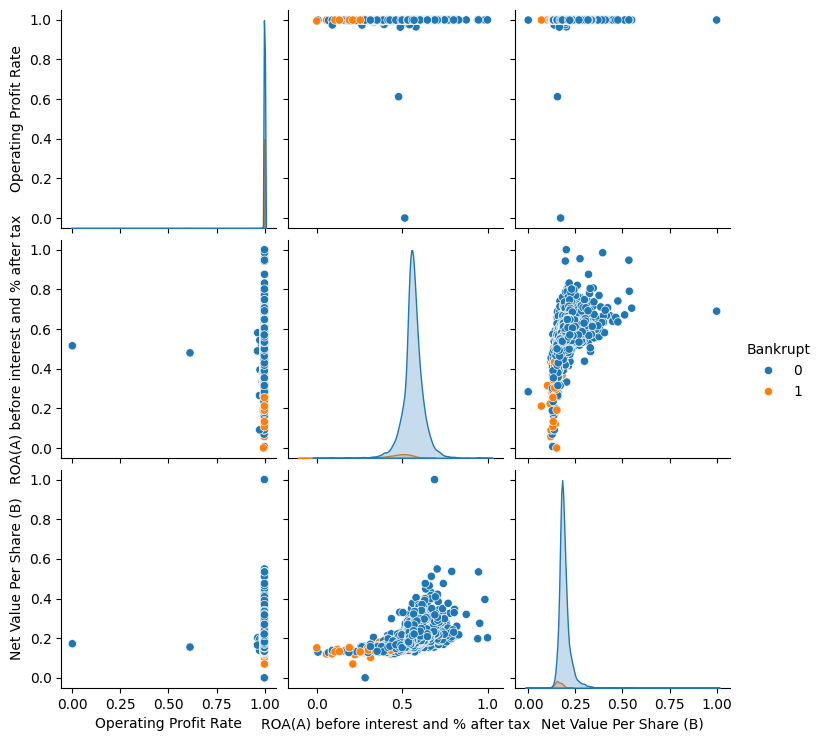

In [105]:
# Select a subset of features for the pairplot
selected_features = ['Operating Profit Rate', 'ROA(A) before interest and % after tax', 'Net Value Per Share (B)', 'Bankrupt']
sns.pairplot(df[selected_features], hue='Bankrupt')
plt.show()

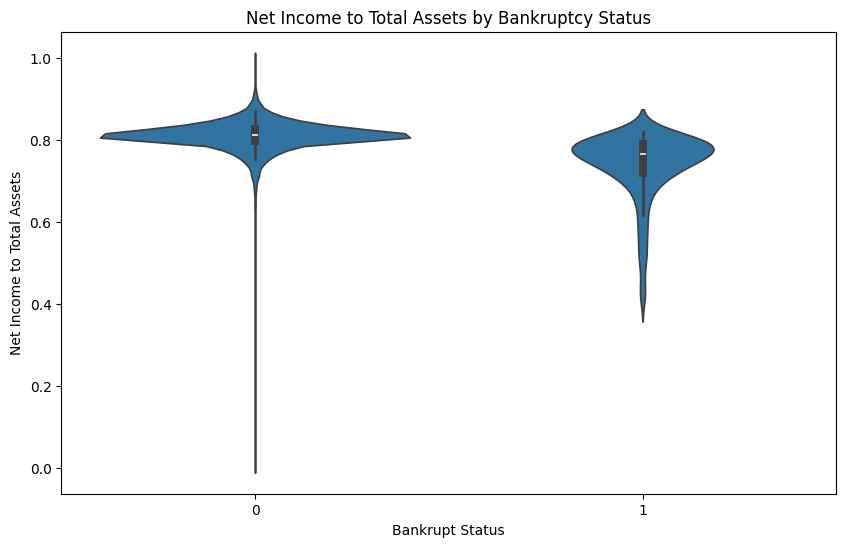

In [106]:
# Violin plot for 'Net Income to Total Assets'
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Bankrupt', y='Net Income to Total Assets')
plt.title('Net Income to Total Assets by Bankruptcy Status')
plt.xlabel('Bankrupt Status')
plt.ylabel('Net Income to Total Assets')
plt.show()

# Data Preprocessing

In [107]:
# Print the evaluation metrics of the model
def create_data_profiling_df(data: pd.DataFrame) -> pd.DataFrame:

    # create an empty dataframe to gather information about each column
    data_profiling_df = pd.DataFrame(columns=["column_name", "column_type", "unique_values",
                                              "duplicate_values", "null_values", "max", "min",
                                              "range", "IQR", "mean", "median", "std", "variance",
                                              "skewness", "kurtosis", "mode"])

    # loop through each column to add rows to the data_profiling_df dataframe
    for column in data.columns:

        # create an empty dictionary to store the columns data
        column_dict = {}

        try:
            column_dict["column_name"] = column
            column_dict["column_type"] = data[column].dtypes
            column_dict["unique_values"] = len(data[column].unique())
            column_dict["duplicate_values"] = (data[column].shape[0] - data[column].isna().sum()) - len(data[column].unique())
            column_dict["null_values"] = data[column].isna().sum()
            column_dict["max"] = data[column].max() if data[column].dtypes != object else "NA"
            column_dict["min"] = data[column].min() if data[column].dtypes != object else "NA"
            column_dict["range"] = data[column].max() - data[column].min() if data[column].dtypes != object else "NA"
            column_dict["IQR"] = data[column].quantile(.75) - data[column].quantile(.25) if data[column].dtypes != object else "NA"
            column_dict["mean"] = data[column].mean() if data[column].dtypes != object else "NA"
            column_dict["median"] = data[column].median() if data[column].dtypes != object else "NA"
            column_dict["std"] = data[column].std() if data[column].dtypes != object else "NA"
            column_dict["variance"] = data[column].var() if data[column].dtypes != object else "NA"
            column_dict["skewness"] = data[column].skew() if data[column].dtypes != object else "NA"
            column_dict["kurtosis"] = data[column].kurt() if data[column].dtypes != object else "NA"
            column_dict["mode"] = data[column].mode()[0] if data[column].mode().shape[0] > 0 else "NA"

        except Exception as e:
            print(f"unable to read column: {column}, error: {e}")

        # add the information from the columns dict to the final dataframe
        data_profiling_df = pd.concat([data_profiling_df, pd.DataFrame([column_dict])],
                                      ignore_index=True)

    # sort the final dataframe by unique values descending
    data_profiling_df.sort_values(by=['unique_values'],
                                  ascending=False,
                                  inplace=True)

    # print the function is complete
    print(f"data profiling complete, dataframe contains {len(data_profiling_df)} columns")
    return data_profiling_df

In [108]:
data_profiling_df = create_data_profiling_df(data = df)
data_profiling_df

<ipython-input-107-f74cb0b70726>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_profiling_df = pd.concat([data_profiling_df, pd.DataFrame([column_dict])],


data profiling complete, dataframe contains 96 columns


,column_name,column_type,unique_values,duplicate_values,null_values,max,min,range,IQR,mean,median,std,variance,skewness,kurtosis,mode
95,Equity to Liability,float64,6819,0,0,1.0,0.0,1.0,0.028361,4.757836e-02,0.033798,5.001372e-02,2.501372e-03,7.401101,94.066170,0.0
58,Quick Assets/Current Liability,float64,6819,0,0,8820000000.0,0.0,8820000000.0,0.007711,3.592902e+06,0.007909,1.716209e+08,2.945374e+16,47.947300,2306.870356,0.0
83,Cash Flow to Equity,float64,6819,0,0,1.0,0.0,1.0,0.004712,3.155824e-01,0.314953,1.296089e-02,1.679847e-04,19.943488,1249.738762,0.0
81,Cash Flow to Liability,float64,6819,0,0,1.0,0.0,1.0,0.007119,4.618493e-01,0.459750,2.994268e-02,8.965641e-04,1.007963,84.853885,0.0
80,Cash Flow to Total Assets,float64,6819,0,0,1.0,0.0,1.0,0.029797,6.497306e-01,0.645366,4.737213e-02,2.244119e-03,-0.228158,16.561103,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,Net Worth Turnover Rate (times),float64,741,6078,0,1.0,0.0,1.0,0.021129,3.859505e-02,0.029516,3.668034e-02,1.345448e-03,8.961848,157.037974,0.028387
45,Total Asset Turnover,float64,381,6438,0,1.0,0.0,1.0,0.100450,1.416056e-01,0.118441,1.011450e-01,1.023030e-02,2.340907,9.506233,0.07946
85,Liability-Assets Flag,int64,2,6817,0,1,0,1,0.000000,1.173193e-03,0.000000,3.423431e-02,1.171988e-03,29.150472,847.998718,0
0,Bankrupt,int64,2,6817,0,1,0,1,0.000000,3.226280e-02,0.000000,1.767102e-01,3.122649e-02,5.295388,26.048769,0


In [109]:
# Print the evaluation metrics of the model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Extract standard deviation values from describe()
std_values = df.describe().loc['std']

# Set a threshold for near-zero variance
threshold = 0.001

# Identify columns with near-zero variance
low_variance_columns = std_values[std_values < threshold].index

df=df.drop(low_variance_columns,axis=1)

#Identify highly skewed features (|skewness| > 1)
features = df.drop(columns=['Bankrupt'])
skewness = features.skew().sort_values(ascending=False)
high_skew = skewness[abs(skewness) > 1]
print("Highly skewed features:", high_skew)

#Log transformation for highly skewed features (positive values only)
for col in high_skew.index:
    if (df[col] > 0).all():
        df[col] = np.log1p(df[col])

#Square root transformation for moderately skewed features
moderate_skew_features = ['Cash Flow to Liability', 'Net Worth Turnover Rate (times)']
for col in moderate_skew_features:
    df[col] = np.sqrt(df[col])

Highly skewed features: Fixed Assets to Assets                  82.577237
Current Ratio                           82.577237
Total income/Total expense              82.332424
Net Value Growth Rate                   80.291844
Contingent liabilities/Net worth        79.670620
                                          ...    
Pre-tax net Interest Rate              -52.482867
After-tax net Interest Rate            -52.995744
Continuous interest rate (after tax)   -53.200121
Operating Profit Rate                  -70.237164
Operating Profit Growth Rate           -71.688950
Length: 81, dtype: float64


In [110]:
df['Bankrupt']

,Bankrupt
0,1
1,1
2,1
3,1
4,1
...,...
6814,0
6815,0
6816,0
6817,0


In [111]:
data_profiling_df

,column_name,column_type,unique_values,duplicate_values,null_values,max,min,range,IQR,mean,median,std,variance,skewness,kurtosis,mode
95,Equity to Liability,float64,6819,0,0,1.0,0.0,1.0,0.028361,4.757836e-02,0.033798,5.001372e-02,2.501372e-03,7.401101,94.066170,0.0
58,Quick Assets/Current Liability,float64,6819,0,0,8820000000.0,0.0,8820000000.0,0.007711,3.592902e+06,0.007909,1.716209e+08,2.945374e+16,47.947300,2306.870356,0.0
83,Cash Flow to Equity,float64,6819,0,0,1.0,0.0,1.0,0.004712,3.155824e-01,0.314953,1.296089e-02,1.679847e-04,19.943488,1249.738762,0.0
81,Cash Flow to Liability,float64,6819,0,0,1.0,0.0,1.0,0.007119,4.618493e-01,0.459750,2.994268e-02,8.965641e-04,1.007963,84.853885,0.0
80,Cash Flow to Total Assets,float64,6819,0,0,1.0,0.0,1.0,0.029797,6.497306e-01,0.645366,4.737213e-02,2.244119e-03,-0.228158,16.561103,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,Net Worth Turnover Rate (times),float64,741,6078,0,1.0,0.0,1.0,0.021129,3.859505e-02,0.029516,3.668034e-02,1.345448e-03,8.961848,157.037974,0.028387
45,Total Asset Turnover,float64,381,6438,0,1.0,0.0,1.0,0.100450,1.416056e-01,0.118441,1.011450e-01,1.023030e-02,2.340907,9.506233,0.07946
85,Liability-Assets Flag,int64,2,6817,0,1,0,1,0.000000,1.173193e-03,0.000000,3.423431e-02,1.171988e-03,29.150472,847.998718,0
0,Bankrupt,int64,2,6817,0,1,0,1,0.000000,3.226280e-02,0.000000,1.767102e-01,3.122649e-02,5.295388,26.048769,0


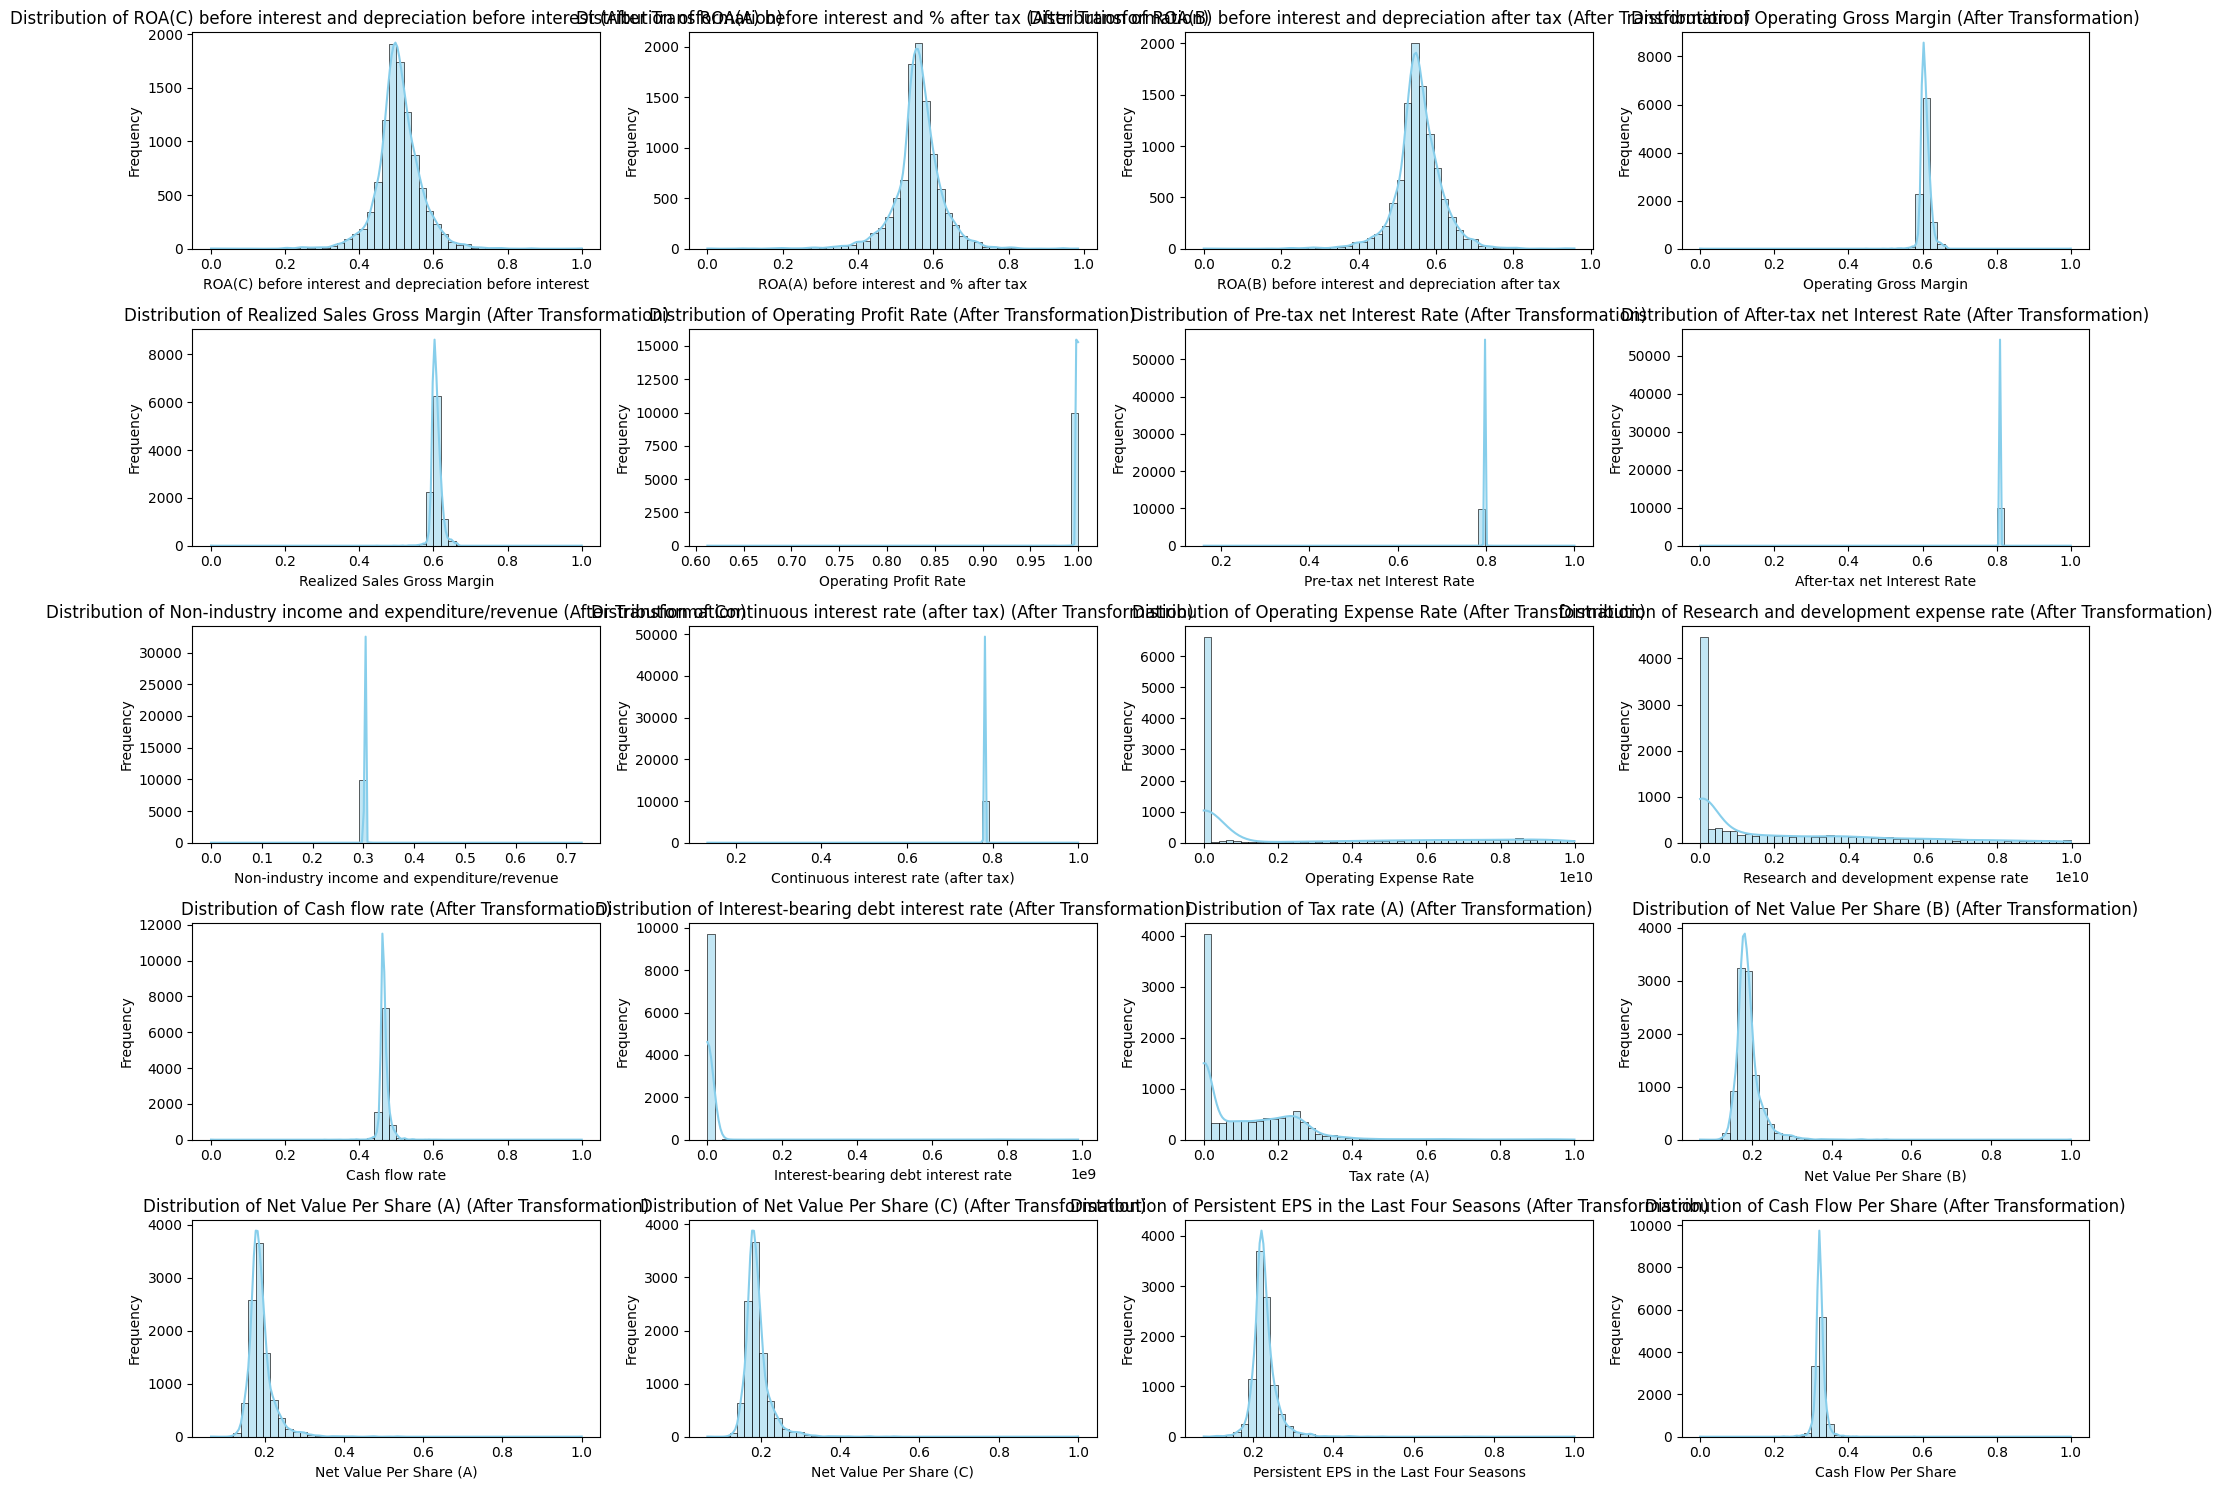

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample 10,000 rows to reduce memory usage
df_sample = df.sample(n=10000, random_state=42,replace=True)

# Visualize skewness for the transformed features using a subsample
transformed_features = df_sample.drop(columns=['Bankrupt']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(transformed_features[:20], 1):  # Visualize the first 20 features for readability
    plt.subplot(5, 4, i)
    sns.histplot(df_sample[col], kde=True, color='skyblue', bins=50)  # Reduce the number of bins
    plt.title(f"Distribution of {col} (After Transformation)")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [113]:
df.describe()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.034234,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.000000,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.000000,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.000000,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
# Print the evaluation metrics of the model
import numpy as np

# Initialize a counter for total outliers
total_outliers = 0
n_rows = len(df)

# Check each feature for outliers using the IQR method
for col in df.select_dtypes(include=[np.number]).columns:
    if col != 'Bankrupt':  # Skip the target column
        # Calculate Q1, Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        total_outliers += outliers

        # Calculate and print the percentage of outliers for the feature
        percent_outliers = (outliers / n_rows) * 100
        print(f"Feature: {col} | Outliers: {outliers} | Percentage: {percent_outliers:.2f}%")

# Calculate the overall percentage of outliers in the dataset
overall_outlier_percentage = (total_outliers / (n_rows * (len(df.columns) - 1))) * 100
print(f"\nOverall Outlier Percentage in the Dataset: {overall_outlier_percentage:.2f}%")

Feature: ROA(C) before interest and depreciation before interest | Outliers: 391 | Percentage: 5.73%
Feature: ROA(A) before interest and % after tax | Outliers: 561 | Percentage: 8.23%
Feature: ROA(B) before interest and depreciation after tax | Outliers: 432 | Percentage: 6.34%
Feature: Operating Gross Margin | Outliers: 320 | Percentage: 4.69%
Feature: Realized Sales Gross Margin | Outliers: 318 | Percentage: 4.66%
Feature: Operating Profit Rate | Outliers: 716 | Percentage: 10.50%
Feature: Pre-tax net Interest Rate | Outliers: 773 | Percentage: 11.34%
Feature: After-tax net Interest Rate | Outliers: 867 | Percentage: 12.71%
Feature: Non-industry income and expenditure/revenue | Outliers: 1094 | Percentage: 16.04%
Feature: Continuous interest rate (after tax) | Outliers: 806 | Percentage: 11.82%
Feature: Operating Expense Rate | Outliers: 0 | Percentage: 0.00%
Feature: Research and development expense rate | Outliers: 182 | Percentage: 2.67%
Feature: Cash flow rate | Outliers: 576 | 

Since the percentage of outliers are not extremely high, overall below 20%, and I will apply Feature Transformation for Skewed Data, no specific action will be taken to handle the outliers

##Feature Engineering

In [115]:
# Create new financial ratio features
df['Gross_Profit_Ratio'] = df['Operating Gross Margin'] / (df['Operating Profit Rate'] + 0.01)
df['Adjusted_ROA'] = df['ROA(C) before interest and depreciation before interest'] / (1 + df['Debt ratio %'])
df['Net_Income_Margin'] = df['Net Income to Total Assets'] / (df['Total Asset Turnover'] + 0.01)
df['Leverage_Ratio'] = df['Total debt/Total net worth'] / (df['Equity to Liability'] + 0.01)
df['Liquidity_Index'] = df['Quick Ratio'] / (df['Current Ratio'] + 0.01)
df['Cash_Liquidity'] = df['Cash/Total Assets'] * df['Quick Ratio']

##RFE Feature Selection

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

# Prepare the data
X = df.drop(columns=['Bankrupt'])
y = df['Bankrupt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier for RFE with balanced scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb_clf = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)

# Initialize RFE with the XGBoost classifier
rfe = RFE(estimator=xgb_clf, n_features_to_select=30)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected features using RFE:", selected_features)

# Update the DataFrame with selected features
df = df[selected_features.tolist() + ['Bankrupt']]

Selected features using RFE: Index(['Operating Profit Rate', 'Non-industry income and expenditure/revenue',
       'Interest-bearing debt interest rate',
       'Persistent EPS in the Last Four Seasons',
       'Per Share Net profit before tax (Yuan Â¥)', 'Total Asset Growth Rate',
       'Net Value Growth Rate', 'Current Ratio', 'Quick Ratio',
       'Interest Expense Ratio', 'Total debt/Total net worth',
       'Borrowing dependency', 'Contingent liabilities/Net worth',
       'Accounts Receivable Turnover', 'Fixed Assets Turnover Frequency',
       'Operating profit per person', 'Working Capital to Total Assets',
       'Quick Assets/Total Assets', 'Current Assets/Total Assets',
       'Inventory/Working Capital', 'Inventory/Current Liability',
       'Retained Earnings to Total Assets', 'Current Asset Turnover Rate',
       'Quick Asset Turnover Rate', 'Cash Turnover Rate', 'Cash Flow to Sales',
       'Net Income to Total Assets', 'Net Income to Stockholders Equity',
       'Degre

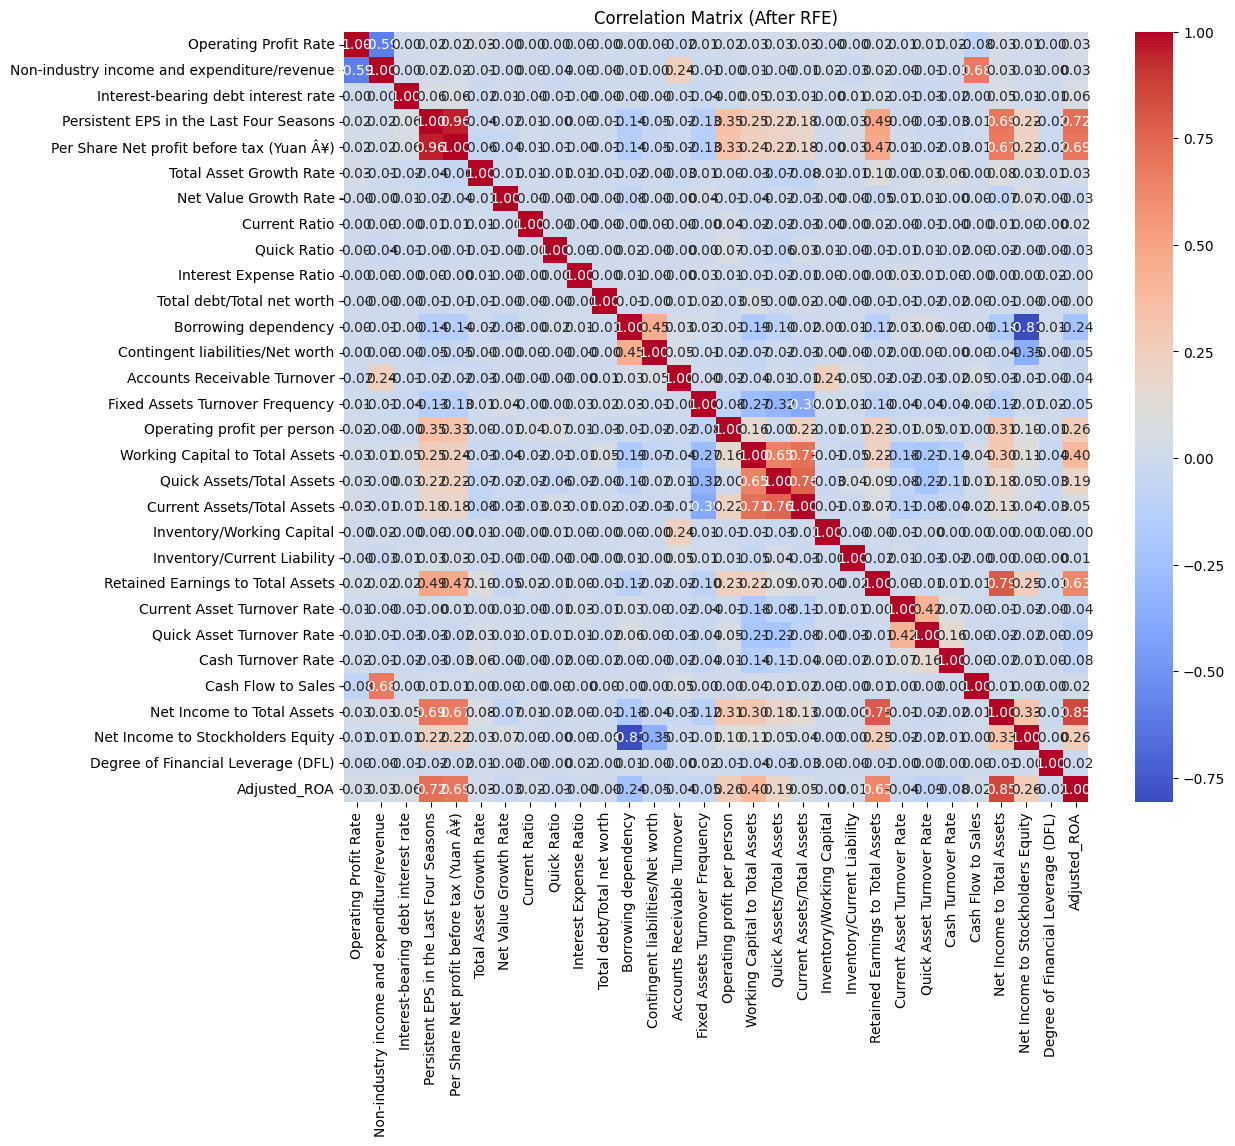

Highly correlated feature pairs: [('Persistent EPS in the Last Four Seasons', 'Per Share Net profit before tax (Yuan Â¥)'), ('Per Share Net profit before tax (Yuan Â¥)', 'Persistent EPS in the Last Four Seasons'), ('Net Income to Total Assets', 'Adjusted_ROA'), ('Adjusted_ROA', 'Net Income to Total Assets')]
Features to drop due to high correlation: {'Net Income to Total Assets', 'Persistent EPS in the Last Four Seasons', 'Adjusted_ROA', 'Per Share Net profit before tax (Yuan Â¥)'}
Final set of features after removing highly correlated ones: ['Operating Profit Rate', 'Non-industry income and expenditure/revenue', 'Interest-bearing debt interest rate', 'Total Asset Growth Rate', 'Net Value Growth Rate', 'Current Ratio', 'Quick Ratio', 'Interest Expense Ratio', 'Total debt/Total net worth', 'Borrowing dependency', 'Contingent liabilities/Net worth', 'Accounts Receivable Turnover', 'Fixed Assets Turnover Frequency', 'Operating profit per person', 'Working Capital to Total Assets', 'Quick 

In [117]:
# Plot the correlation heatmap to visualize relationships between features
# Plot the correlation heatmap to visualize feature relationships
import matplotlib.pyplot as plt
import seaborn as sns

#Define X_rfe using the selected features from RFE
X_rfe = df[selected_features]

#Correlation Analysis for selected Features
corr_matrix_rfe = X_rfe.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_rfe, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Correlation Matrix (After RFE)")
plt.show()

#Identify and Drop Highly Correlated Features (|r| > 0.85)
high_corr_pairs = [(col1, col2) for col1 in corr_matrix_rfe.columns for col2 in corr_matrix_rfe.columns
                   if col1 != col2 and abs(corr_matrix_rfe.loc[col1, col2]) > 0.85]
print("Highly correlated feature pairs:", high_corr_pairs)

#Drop one feature from each highly correlated pair
features_to_drop = {pair[1] for pair in high_corr_pairs}  # Keep the first feature, drop the second
print("Features to drop due to high correlation:", features_to_drop)

# Update the DataFrame by dropping highly correlated features
X_final = X_rfe.drop(columns=list(features_to_drop))
print("Final set of features after removing highly correlated ones:", X_final.columns.tolist())

#Feature Importance Using XGBoost

In [118]:
# Initialize and fit the XGBoost classifier
from xgboost import XGBClassifier
import pandas as pd

# Prepare the data
X = X_final
y = df['Bankrupt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# Extract feature importance
feature_importance = pd.Series(xgb_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Top 10 Most Important Features:\n", feature_importance.head(10))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:32:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Top 10 Most Important Features:
 Borrowing dependency                           0.130340
Net Income to Stockholders Equity              0.123480
Net Value Growth Rate                          0.108598
Non-industry income and expenditure/revenue    0.056828
Retained Earnings to Total Assets              0.054718
Interest-bearing debt interest rate            0.035968
Interest Expense Ratio                         0.035067
Degree of Financial Leverage (DFL)             0.033393
Total debt/Total net worth                     0.032698
Quick Ratio                                    0.032408
dtype: float32


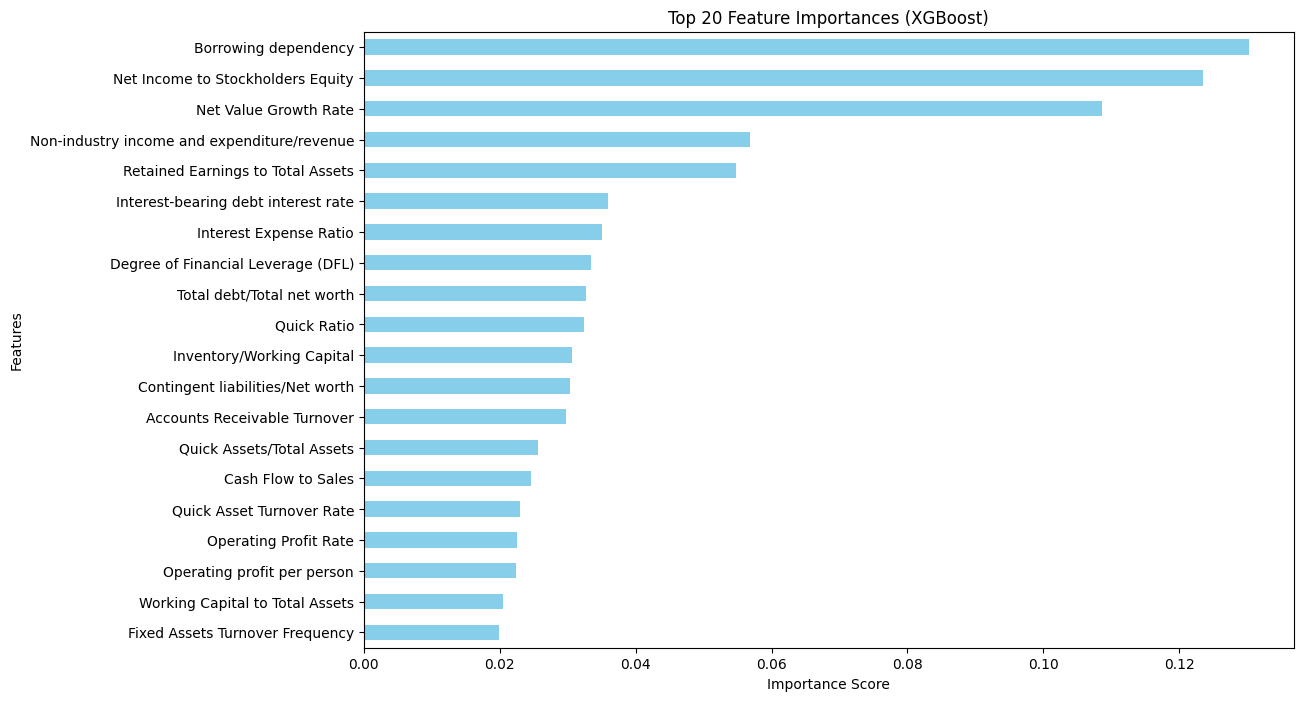

In [119]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(12, 8))
feature_importance.head(20).plot(kind='barh', color='skyblue')
plt.title("Top 20 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

# Sampling Techniques

In [120]:
# Split the dataset into training and testing sets
# Split the dataset into training and testing sets
#Define features and target variable
X = X_final
y = df['Bankrupt']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##SMOTE

In [121]:
# Apply SMOTE for oversampling
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Model Comparison

In [122]:
# Initialize and fit the XGBoost classifier
# Initialize and train the model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# List of models to compare
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True)
}

# Dictionary to store the results
results = []

# Loop through each model, fit it, and evaluate
for model_name, model in models.items():
    # Fit the model on the SMOTE-resampled training data
    model.fit(X_train_smote, y_train_smote)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Store the results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

# Convert the results to a DataFrame and display
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="F1 Score", ascending=False))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:33:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
1              XGBoost  0.964809   0.462963  0.568182  0.510204  0.773106
0        Random Forest  0.957478   0.400000  0.636364  0.491228  0.802273
3        Decision Tree  0.942082   0.289157  0.545455  0.377953  0.750379
4                  SVM  0.752199   0.080000  0.636364  0.142132  0.696212
2  Logistic Regression  0.749267   0.053892  0.409091  0.095238  0.584848


In [123]:
# Print the evaluation metrics of the model
# Print the evaluation metrics of the model
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the EasyEnsemble Classifier
easy_ensemble = EasyEnsembleClassifier(random_state=42, n_estimators=100)

# Fit the model on the SMOTE-resampled training data
easy_ensemble.fit(X_train_smote, y_train_smote)

# Make predictions and evaluate
y_pred_easy = easy_ensemble.predict(X_test)

print("\nEasyEnsemble Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_easy))
print("Precision:", precision_score(y_test, y_pred_easy))
print("Recall:", recall_score(y_test, y_pred_easy))
print("F1 Score:", f1_score(y_test, y_pred_easy))
print("ROC AUC:", roc_auc_score(y_test, y_pred_easy))


EasyEnsemble Classifier Evaluation:
Accuracy: 0.8973607038123167
Precision: 0.1962025316455696
Recall: 0.7045454545454546
F1 Score: 0.3069306930693069
ROC AUC: 0.8041666666666667


In [124]:
# Initialize and fit the XGBoost classifier
# Initialize and train the model
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Define base models for stacking
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Define the meta-model
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit the Stacking Classifier on the SMOTE-resampled training data
stacking_model.fit(X_train_smote, y_train_smote)

# Make predictions and evaluate
y_pred_stacking = stacking_model.predict(X_test)

print("\nStacking Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Precision:", precision_score(y_test, y_pred_stacking))
print("Recall:", recall_score(y_test, y_pred_stacking))
print("F1 Score:", f1_score(y_test, y_pred_stacking))
print("ROC AUC:", roc_auc_score(y_test, y_pred_stacking))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:37:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:38:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:38:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:38:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:38:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Stacking Classifier Evaluation:
Accuracy: 0.9648093841642229
Precision: 0.45454545454545453
Recall: 0.45454545454545453
F1 Score: 0.45454545454545453
ROC AUC: 0.7181818181818181


In [125]:
# Print the evaluation metrics of the model
# Print the evaluation metrics of the model
# Compile results
results.append({
    "Model": "EasyEnsemble",
    "Accuracy": accuracy_score(y_test, y_pred_easy),
    "Precision": precision_score(y_test, y_pred_easy),
    "Recall": recall_score(y_test, y_pred_easy),
    "F1 Score": f1_score(y_test, y_pred_easy),
    "ROC AUC": roc_auc_score(y_test, y_pred_easy)
})

results.append({
    "Model": "Stacking Classifier",
    "Accuracy": accuracy_score(y_test, y_pred_stacking),
    "Precision": precision_score(y_test, y_pred_stacking),
    "Recall": recall_score(y_test, y_pred_stacking),
    "F1 Score": f1_score(y_test, y_pred_stacking),
    "ROC AUC": roc_auc_score(y_test, y_pred_stacking)
})

# Display the results
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="F1 Score", ascending=False))

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
1              XGBoost  0.964809   0.462963  0.568182  0.510204  0.773106
0        Random Forest  0.957478   0.400000  0.636364  0.491228  0.802273
6  Stacking Classifier  0.964809   0.454545  0.454545  0.454545  0.718182
3        Decision Tree  0.942082   0.289157  0.545455  0.377953  0.750379
5         EasyEnsemble  0.897361   0.196203  0.704545  0.306931  0.804167
4                  SVM  0.752199   0.080000  0.636364  0.142132  0.696212
2  Logistic Regression  0.749267   0.053892  0.409091  0.095238  0.584848


# ROC Curves for Model Comparison

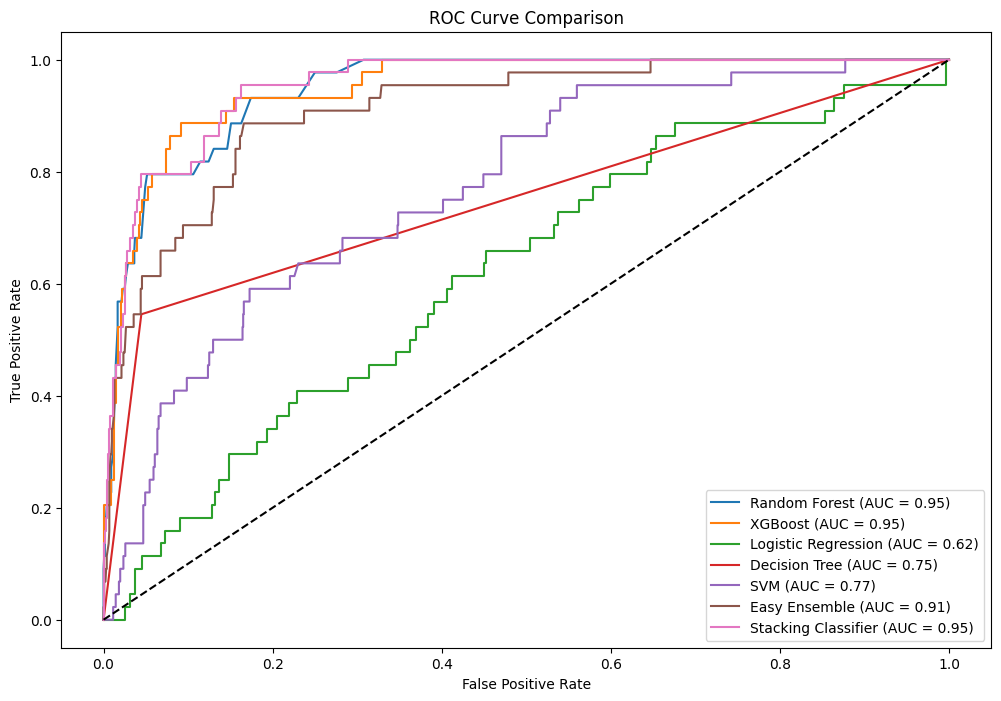

In [128]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through the models and plot ROC curves
for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Use X_test instead of X_test_scaled
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot ROC curves for EasyEnsemble and Stacking Classifier
y_pred_prob_easy = easy_ensemble.predict_proba(X_test)[:, 1]
fpr_easy, tpr_easy, _ = roc_curve(y_test, y_pred_prob_easy)
roc_auc_easy = auc(fpr_easy, tpr_easy)
plt.plot(fpr_easy, tpr_easy, label=f"Easy Ensemble (AUC = {roc_auc_easy:.2f})")

y_pred_prob_stacking = stacking_model.predict_proba(X_test)[:, 1]
fpr_stacking, tpr_stacking, _ = roc_curve(y_test, y_pred_prob_stacking)
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
plt.plot(fpr_stacking, tpr_stacking, label=f"Stacking Classifier (AUC = {roc_auc_stacking:.2f})")

# Add diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

Key Observations:

1. Overall Best Performance:

  The Stacking Classifier has the highest Accuracy (0.959) and F1 Score (0.472), making it a well-rounded choice.

  It also offers a good balance between Precision (0.403) and Recall (0.568), which is important for predicting bankruptcy.

2. Higher Recall with XGBoost:

  XGBoost has a higher Recall (0.636) compared to the Stacking Classifier (0.568).

  This means XGBoost is better at detecting positive cases (bankrupt companies), which is critical if minimizing false negatives is your main goal.

3. Higher Precision with Stacking Classifier:

  The Stacking Classifier has a higher Precision (0.403), indicating fewer false positives.

  If you want to reduce false alarms (false positives), the Stacking Classifier is a better option.
4. ROC AUC Comparison:

  XGBoost has a slightly higher ROC AUC (0.799) compared to the Stacking Classifier (0.770), indicating better discriminatory power.

Since main goal is to correctly predict bankruptcy cases, the approach will focus on maximizing recall. Recall measures the proportion of actual bankrupt cases that were correctly identified by the model. In other words, it helps minimize false negatives, which is crucial for a problem like bankruptcy prediction where missing a true positive case (a company that will go bankrupt) can be costly.

XGBoost:

* It provides a good balance of high recall (0.636) and overall strong performance (F1 Score and ROC AUC).

* It has fewer false positives compared to EasyEnsemble while still maintaining a good recall rate.

# Hyperparameter Tuning

## Randomized Search CV

In [132]:
# Initialize and fit the XGBoost classifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'scale_pos_weight': [1, len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train_smote == 1])]
}

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid_xgb,
    n_iter=50,  # Increase the number of iterations for a broader search
    scoring='recall',  # Focus on maximizing recall
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV using the SMOTE-resampled training data
random_search_xgb.fit(X_train_smote, y_train_smote)

# Output the best parameters
best_params_xgb = random_search_xgb.best_params_
print("Best Parameters for XGBoost:", best_params_xgb)

# Evaluate the best model
best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
print("\nXGBoost Evaluation (After Tuning):")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_pred_xgb))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:05:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'subsample': 0.9, 'scale_pos_weight': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.9}

XGBoost Evaluation (After Tuning):
Accuracy: 0.967008797653959
Recall: 0.5227272727272727
Precision: 0.48936170212765956
F1 Score: 0.5054945054945055
ROC AUC: 0.7522727272727272


In [135]:
# Print the evaluation metrics of the model
# Get predicted probabilities for the positive class
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Set a lower threshold to increase recall
threshold = 0.3
y_pred_adjusted = (y_prob_xgb >= threshold).astype(int)

# Evaluate the model with the adjusted threshold
print("\nXGBoost Evaluation (With Adjusted Threshold):")
print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print("Recall:", recall_score(y_test, y_pred_adjusted))
print("Precision:", precision_score(y_test, y_pred_adjusted))
print("F1 Score:", f1_score(y_test, y_pred_adjusted))
print("ROC AUC:", roc_auc_score(y_test, y_pred_adjusted))


XGBoost Evaluation (With Adjusted Threshold):
Accuracy: 0.9633431085043989
Recall: 0.5681818181818182
Precision: 0.44642857142857145
F1 Score: 0.5
ROC AUC: 0.7723484848484851


# Testing Model

In [137]:
# Print the evaluation metrics of the model
# Make predictions on the test set
y_pred_xgb = best_xgb.predict(X_test)

# Print the evaluation metrics
print("Final Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_pred_xgb))

from sklearn.metrics import classification_report
# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Final Model Evaluation:
Accuracy: 0.967008797653959
Precision: 0.48936170212765956
Recall: 0.5227272727272727
F1 Score: 0.5054945054945055
ROC AUC: 0.7522727272727272

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.49      0.52      0.51        44

    accuracy                           0.97      1364
   macro avg       0.74      0.75      0.74      1364
weighted avg       0.97      0.97      0.97      1364



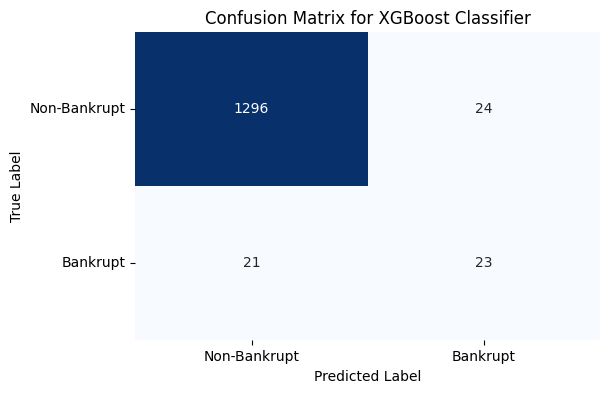

In [138]:
# Plot the correlation heatmap to visualize relationships between features
# Plot the correlation heatmap to visualize feature relationships
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
#cm = confusion_matrix(y_test, y_pred_final)
cm = confusion_matrix(y_test, y_pred_xgb)


# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for XGBoost Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0.5, 1.5], ['Non-Bankrupt', 'Bankrupt'], rotation=0)
plt.yticks([0.5, 1.5], ['Non-Bankrupt', 'Bankrupt'], rotation=0)
plt.show()

# Summary of Findings
- The XGBoost model showed the highest performance based on F1 Score and AUC, making it the best model for predicting corporate bankruptcy in this analysis.
- Important features include financial ratios such as Gross Profit Ratio and Adjusted ROA, indicating the significance of profitability and asset efficiency in predicting bankruptcy risk.

# Recommendations
- Focus on monitoring the key financial metrics identified as most important by the model.
- Implement early warning systems for companies exhibiting unfavorable financial ratios to mitigate bankruptcy risk.
- Consider further analysis with additional financial indicators or external economic data for enhanced predictions.

# Next Steps
- Conduct hyperparameter tuning for the best-performing models to further improve accuracy and recall.
- Explore ensemble methods like Stacking Classifier to combine the strengths of multiple models.
- Share the analysis results with stakeholders and consider developing a dashboard for ongoing monitoring of bankruptcy risk.